In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  

df.head()

,DATUM,Artikel3,Artikel5
0,2013-01-01,77.2900,25.1125
1,2013-01-02,7970.3100,2394.2700
2,2013-01-03,7449.9850,2247.8050
3,2013-01-04,9707.6750,2841.6650
4,2013-01-05,14462.7925,4858.4950


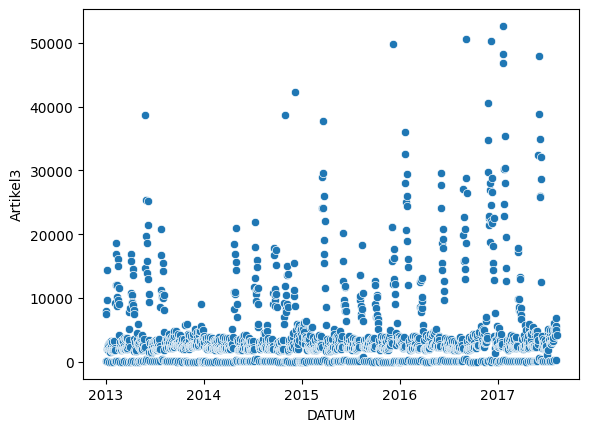

In [2]:
ax = sns.scatterplot(x='DATUM', y='Artikel3', data=df)

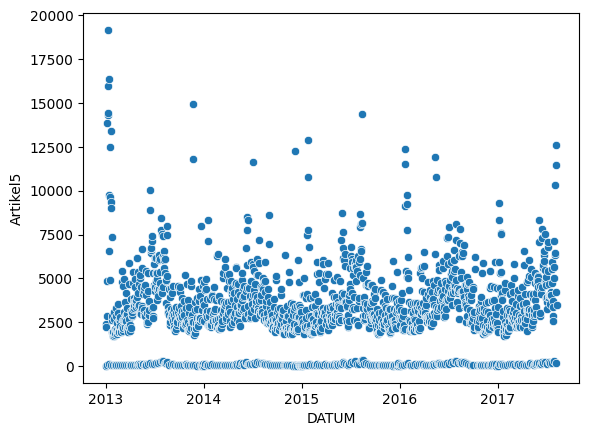

In [3]:
ax = sns.scatterplot(x='DATUM', y='Artikel5', data=df)

In [4]:
import holidays
df['DATUM']  =  pd.to_datetime(df['DATUM']) 

#add day name
df['Day'] = df['DATUM'].dt.day_name()
#flag holidays
at_holidays = holidays.Austria(years=df['DATUM'].dt.year.unique())
df['Holidays'] = df['DATUM'].dt.date.isin(at_holidays)

In [5]:
df.head()

,DATUM,Artikel3,Artikel5,Day,Holidays
0,2013-01-01,77.2900,25.1125,Tuesday,True
1,2013-01-02,7970.3100,2394.2700,Wednesday,False
2,2013-01-03,7449.9850,2247.8050,Thursday,False
3,2013-01-04,9707.6750,2841.6650,Friday,False
4,2013-01-05,14462.7925,4858.4950,Saturday,False


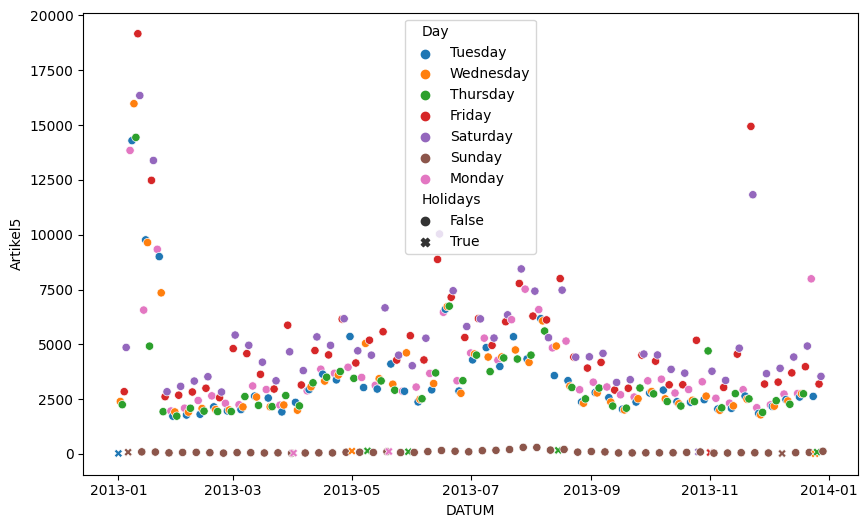

In [6]:
df_2013 = df[df['DATUM'].dt.isocalendar().year == 2013]
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(x='DATUM', y='Artikel5', hue = 'Day', style = 'Holidays', data=df_2013)


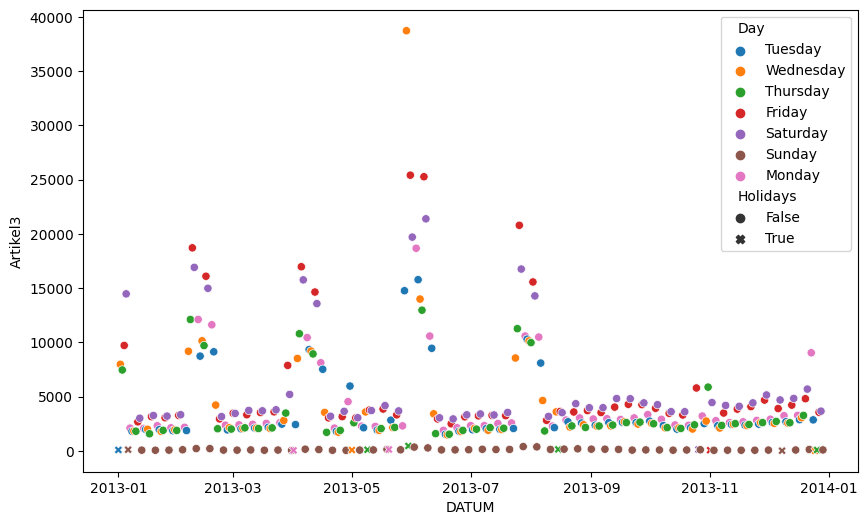

In [7]:
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(x='DATUM', y='Artikel3', style = 'Holidays', hue = 'Day', data=df_2013)

In [8]:
from data_transformation import aggregate, prep

In [9]:
df_week = aggregate(df, resample = 'week')

Grouping mean value per week


In [10]:
df_week.head()

,DATUM,Artikel3,Artikel5,Week_number,Year
0,2013-01-07,5979.491071,3755.911429,2,2013
1,2013-01-14,1887.011786,12412.288929,3,2013
2,2013-01-21,2039.244286,8516.108214,4,2013
3,2013-01-28,2007.344643,3677.278929,5,2013
4,2013-02-04,2070.541786,1898.018929,6,2013


In [11]:
df_month = aggregate(df, resample = 'month')

Grouping mean value per month


In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_week, x='DATUM', y='Artikel3', marker='o')
plt.title('Weekly Mean Values')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 241 and the vector passed to `y` has length 2.

<Figure size 1000x600 with 0 Axes>

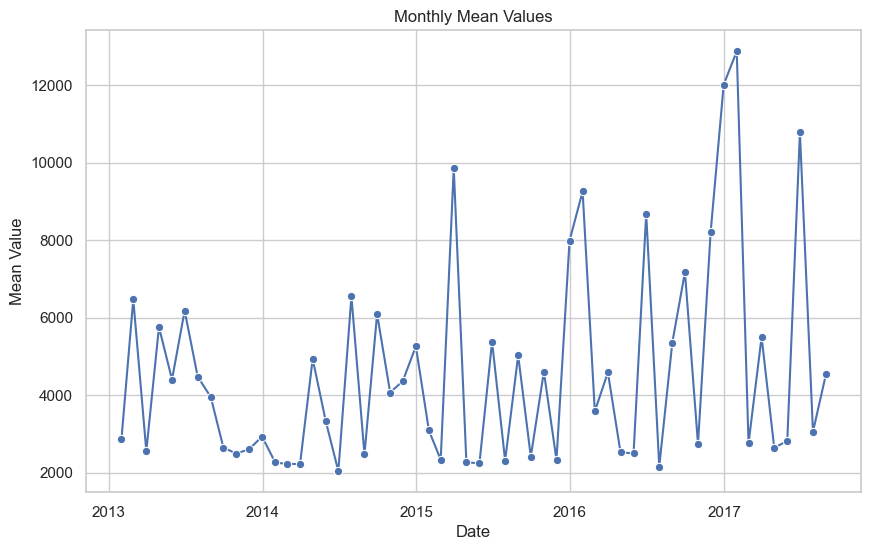

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_month, x='DATUM', y='Artikel3', marker='o')
plt.title('Monthly Mean Values')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()

Artikel3       float64
Artikel5       float64
dayofweek        int32
Holidays          bool
Week_number      int32
quarter          int32
month            int32
year             int32
dayofyear        int32
dayofmonth       int32
dtype: object
88137339.9124694


/Users/ykinoshita/Documents/Projects/Rewe/venv/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


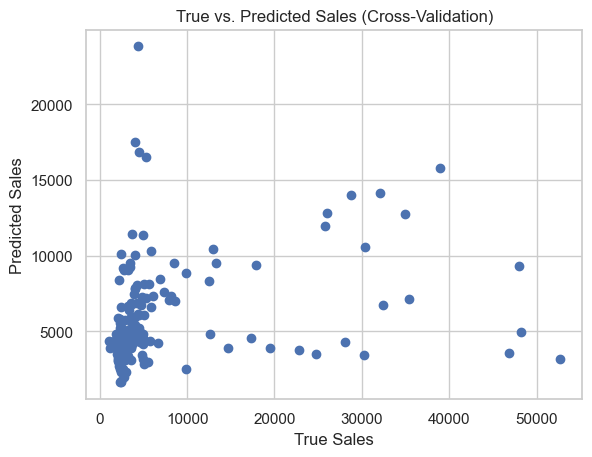

In [14]:
import numpy as np
import pandas as pd
from model import xgb_model
from data_transformation import prep




df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  
df_feat = prep(df)

print(df_feat.dtypes)
test = df_feat[df_feat['year'] == 2017]
train = df_feat[df_feat['year'] != 2017]
#print( np.isnan(train).values.sum() )

xgb_model(train,test)


